In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breeds/dog-breeds/husky/husky56.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky40.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky18.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky58.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky62.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky20.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky75.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky10.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky34.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky28.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky30.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky100.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky71.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky72.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky42.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky74.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky101.jpg
/kaggle/input/dog-breeds/dog-breeds/husky/husky92.jpg
/kaggle/input/dog-breeds/d

### importing libraries

To begin with, we need to import several libraries to enable us to perform various tasks related to data visualization, image processing, and machine learning.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image


### loading the dataset

In [3]:
root="/kaggle/input/dog-breeds/dog-breeds"

In [4]:
dogs=os.listdir(root)
dogs

['husky',
 'beagle',
 'rottweiler',
 'german-shepherd',
 'dalmatian',
 'poodle',
 'bulldog',
 'labrador-retriever']

### Creation of dataframe


In [5]:
images=[]
dog_breed=[]
for dog in dogs:
    directory=root +  "/" + dog + "/"
    for image in os.listdir(directory):
        images.append(directory + image)
        dog_breed.append(dog)   

In [6]:
Images = pd.Series(images, name="Image").astype(str)

In [7]:
Images.head()

0    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
1    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
2    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
3    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
4    /kaggle/input/dog-breeds/dog-breeds/husky/husk...
Name: Image, dtype: object

In [8]:
dog_breed=pd.Series(dog_breed, name="BREED")
data=pd.concat([Images, dog_breed], axis=1)
data.head()

,Image,BREED
0,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
1,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
2,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
3,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
4,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky


In [9]:
data=data.sample(frac=1).reset_index(drop = True)

In [10]:
data


,Image,BREED
0,/kaggle/input/dog-breeds/dog-breeds/labrador-r...,labrador-retriever
1,/kaggle/input/dog-breeds/dog-breeds/labrador-r...,labrador-retriever
2,/kaggle/input/dog-breeds/dog-breeds/german-she...,german-shepherd
3,/kaggle/input/dog-breeds/dog-breeds/bulldog/bu...,bulldog
4,/kaggle/input/dog-breeds/dog-breeds/dalmatian/...,dalmatian
...,...,...
536,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
537,/kaggle/input/dog-breeds/dog-breeds/german-she...,german-shepherd
538,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky
539,/kaggle/input/dog-breeds/dog-breeds/husky/husk...,husky


In [11]:
data.shape

(541, 2)

### Image visualization


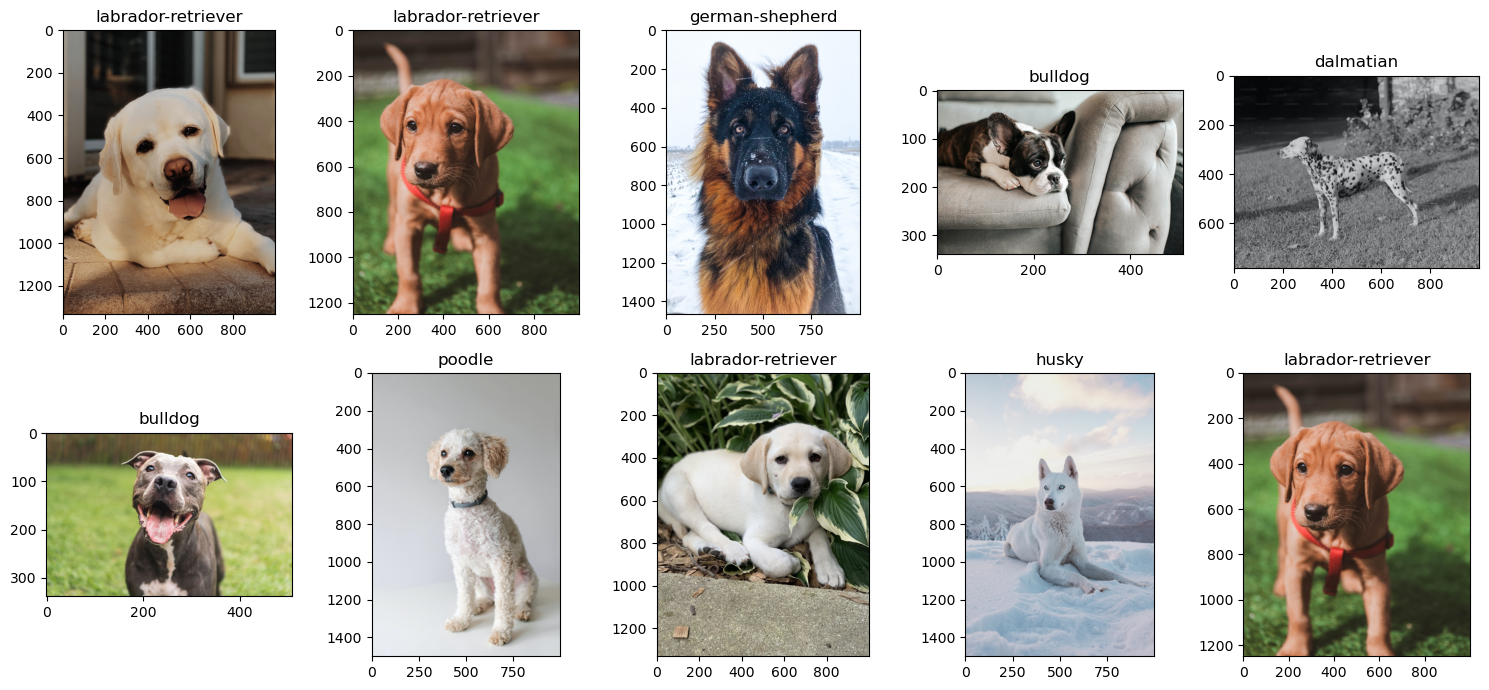

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(data.loc[i, "Image"]))
    ax.set_title(data.loc[i, "BREED"])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
dev, test =train_test_split(data, train_size=0.9, shuffle=True, random_state=42)

### ImageDataGenerator 

In [16]:
import keras
from keras.preprocessing.image import ImageDataGenerator

### flow from dataframe

In [17]:
dev_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    fill_mode="nearest",
    validation_split=0.2
)

In [18]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

### train

In [19]:
train_images = dev_generator.flow_from_dataframe(
    dataframe=dev,
    x_col='Image',
    y_col='BREED',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 389 validated image filenames belonging to 8 classes.


### validate

In [20]:
val_images = dev_generator.flow_from_dataframe(
    dataframe=dev,
    x_col='Image',
    y_col='BREED',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 97 validated image filenames belonging to 8 classes.


### test 

In [21]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test,
    x_col='Image',
    y_col='BREED',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode=None,
    batch_size=32,
    shuffle=False
)

Found 55 validated image filenames.


In [22]:
!pip install tensorflow
!pip install keras


## VGG19 Fine-tuning
**This code demonstrates how to perform fine-tuning using the VGG16 model. The VGG19 model is a deep convolutional neural network that has been pre-trained on the ImageNet dataset. Fine-tuning involves taking the pre-trained model and adapting it to a new task or dataset by training the top layers while keeping the lower layers frozen**

### Code Explanation

    1. Importing Dependencies: We begin by importing the necessary dependencies, including the ResNet model from Keras, as well as other required layers and callbacks

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.applications import VGG19


       1.Load the pre-trained VGG16 model:
    The VGG16 class from keras.applications is used to load the pre-trained VGG16 model without the top layer.
    The weights parameter is set to 'imagenet' to load the weights trained on ImageNet.
    The include_top parameter is set to False to exclude the fully connected layers at the top of the network.
    The input_shape parameter is set to (150, 150, 3) to match the expected input size.

In [24]:
# Define the desired input image size
input_shape = (64, 64, 3)


In [25]:
# Initialize the VGG19 model as the base model
base_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)


80134624/80134624 [==============================] - 0s 0us/step


    2. Freeze the layers in the base model:

    The layers in the base model are iterated through, and their trainable attribute is set to False. This freezes the weights of the layers so that they are not updated during training.
    
    3. Add custom top layers:

    A series of fully connected and dropout layers are added on top of the base model to learn task-specific features.
    The Flatten layer is used to flatten the output of the base model.
    Two Dense layers with 4096 units and ReLU activation are added, along with Dropout layers with a dropout rate of 0.5 to prevent overfitting.
    The final Dense layer with 3 units and softmax activation is added to generate the predictions for the three classes.
    
    4. Create the fine-tuned model:

    The Model class from keras.models is used to create the fine-tuned model, specifying the inputs and outputs.
    The input is set to the input of the base model, and the output is set to the predictions generated by the custom top layers.

In [26]:
# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()

# Add the base model as the first layer
model.add(base_model)

In [27]:
# Add additional layers for classification
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

    5. Compile the model:
    The model is compiled using the Adam optimizer with a learning rate of 0.0001.
    The loss function is set to 'categorical_crossentropy', and the accuracy metric is used for evaluation.

In [28]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               1

    6. Train the model:
    The model is trained using the fit method.
    The training data (train_images) and validation data (val_images) are provided.
    The number of epochs is set to 30, and the defined callbacks (callbacks_list) are used for early stopping and learning rate reduction.

In [29]:
# Training the model
batch_size = 32
history = model.fit(train_images, validation_data=val_images, epochs=15, batch_size=batch_size, callbacks=[EarlyStopping(patience=3), ReduceLROnPlateau()])

Epoch 1/15
13/13 [==============================] - 31s 1s/step - loss: 2.9047 - accuracy: 0.1851 - mse: 0.1318 - val_loss: 2.0973 - val_accuracy: 0.2680 - val_mse: 0.1097 - lr: 0.0010
Epoch 2/15
13/13 [==============================] - 12s 892ms/step - loss: 2.0994 - accuracy: 0.3445 - mse: 0.1055 - val_loss: 2.0031 - val_accuracy: 0.1649 - val_mse: 0.1069 - lr: 0.0010
Epoch 3/15
13/13 [==============================] - 12s 948ms/step - loss: 1.6188 - accuracy: 0.4807 - mse: 0.0870 - val_loss: 1.9225 - val_accuracy: 0.2887 - val_mse: 0.1039 - lr: 0.0010
Epoch 4/15
13/13 [==============================] - 12s 901ms/step - loss: 1.4819 - accuracy: 0.5167 - mse: 0.0807 - val_loss: 1.8426 - val_accuracy: 0.4948 - val_mse: 0.1010 - lr: 0.0010
Epoch 5/15
13/13 [==============================] - 12s 930ms/step - loss: 1.2676 - accuracy: 0.5810 - mse: 0.0694 - val_loss: 1.7895 - val_accuracy: 0.4639 - val_mse: 0.0989 - lr: 0.0010
Epoch 6/15
13/13 [==============================] - 11s 890ms/s

In [31]:
# Training the model
batch_size = 32
history = model.fit(train_images, validation_data=val_images, epochs=50, batch_size=batch_size, callbacks=[ ReduceLROnPlateau()])

Epoch 1/50
13/13 [==============================] - 12s 949ms/step - loss: 0.6439 - accuracy: 0.7686 - mse: 0.0395 - val_loss: 0.8148 - val_accuracy: 0.7113 - val_mse: 0.0483 - lr: 0.0010
Epoch 2/50
13/13 [==============================] - 12s 916ms/step - loss: 0.5694 - accuracy: 0.7969 - mse: 0.0346 - val_loss: 0.7170 - val_accuracy: 0.7835 - val_mse: 0.0411 - lr: 0.0010
Epoch 3/50
13/13 [==============================] - 11s 872ms/step - loss: 0.6415 - accuracy: 0.7712 - mse: 0.0404 - val_loss: 0.7835 - val_accuracy: 0.7320 - val_mse: 0.0461 - lr: 0.0010
Epoch 4/50
13/13 [==============================] - 11s 875ms/step - loss: 0.6413 - accuracy: 0.7815 - mse: 0.0376 - val_loss: 0.8560 - val_accuracy: 0.7320 - val_mse: 0.0472 - lr: 0.0010
Epoch 5/50
13/13 [==============================] - 12s 919ms/step - loss: 0.5655 - accuracy: 0.8123 - mse: 0.0327 - val_loss: 0.5804 - val_accuracy: 0.8041 - val_mse: 0.0336 - lr: 0.0010
Epoch 6/50
13/13 [==============================] - 11s 874m

    7.Conclusion
     we have implemented a vgg19 model for image classification using Keras. The vgg19 model, pre-trained on the ImageNet dataset, serves as a powerful feature extractor. By freezing the pre-trained layers and adding additional layers for classification, we were able to achieve good performance on our image classification task..

###  Training and Validation Metrics Visualization

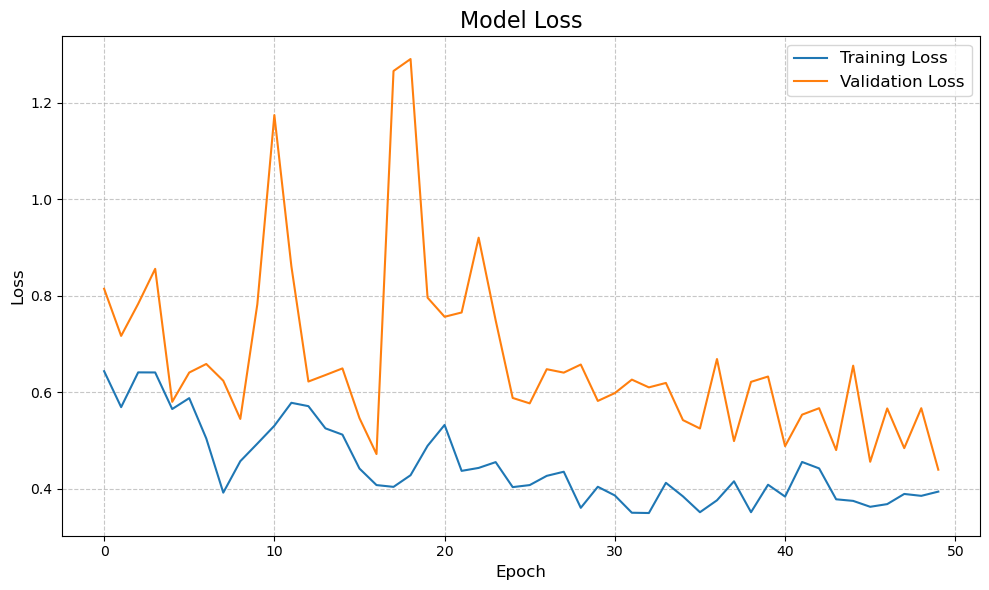

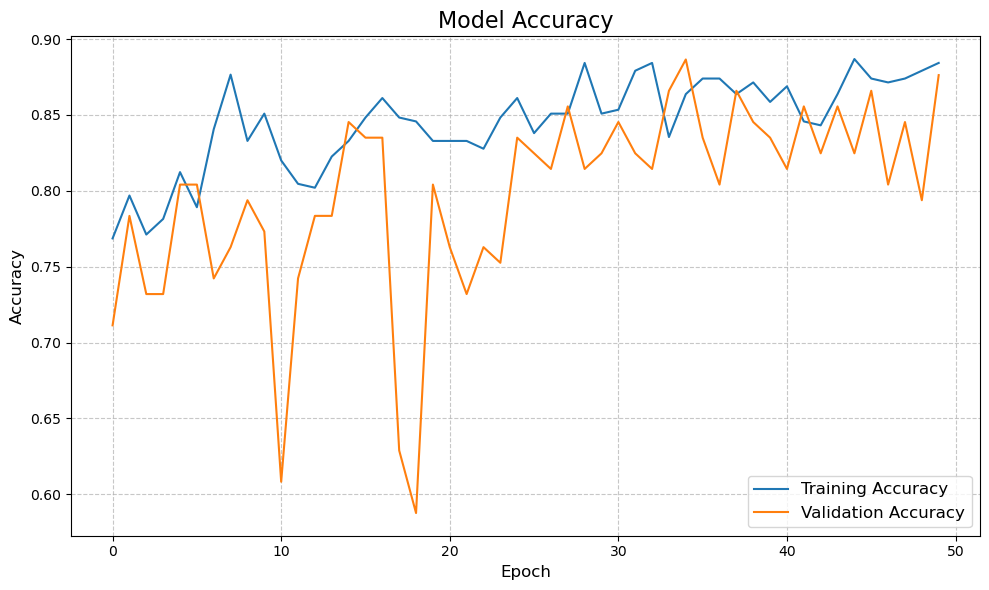

In [32]:
# Plot model loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot model accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Training and Validation Metrics Visualization

In [33]:
img_pred=model.predict(test_images)
img_pred=np.argmax(img_pred, axis=1)

2/2 [==============================] - 5s 4s/step


In [34]:
final=train_images.class_indices
final

{'beagle': 0,
 'bulldog': 1,
 'dalmatian': 2,
 'german-shepherd': 3,
 'husky': 4,
 'labrador-retriever': 5,
 'poodle': 6,
 'rottweiler': 7}

In [35]:
labels = dict((v,k) for k,v in final.items())
y_pred = [labels[k] for k in img_pred]

In [36]:
test.reset_index(drop=True, inplace=True)

###  accuracy evaluation

In [37]:
from sklearn.metrics import accuracy_score, classification_report

In [38]:
y_test=test["BREED"].values

In [39]:
accuracy_score(y_pred, y_test)

0.9090909090909091

In [40]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            beagle       0.71      1.00      0.83         5
           bulldog       0.90      0.90      0.90        10
         dalmatian       1.00      1.00      1.00         8
   german-shepherd       0.80      0.89      0.84         9
             husky       1.00      0.88      0.93         8
labrador-retriever       1.00      1.00      1.00         4
            poodle       1.00      0.80      0.89         5
        rottweiler       1.00      0.83      0.91         6

          accuracy                           0.91        55
         macro avg       0.93      0.91      0.91        55
      weighted avg       0.92      0.91      0.91        55



### Visualizing Predicted Labels

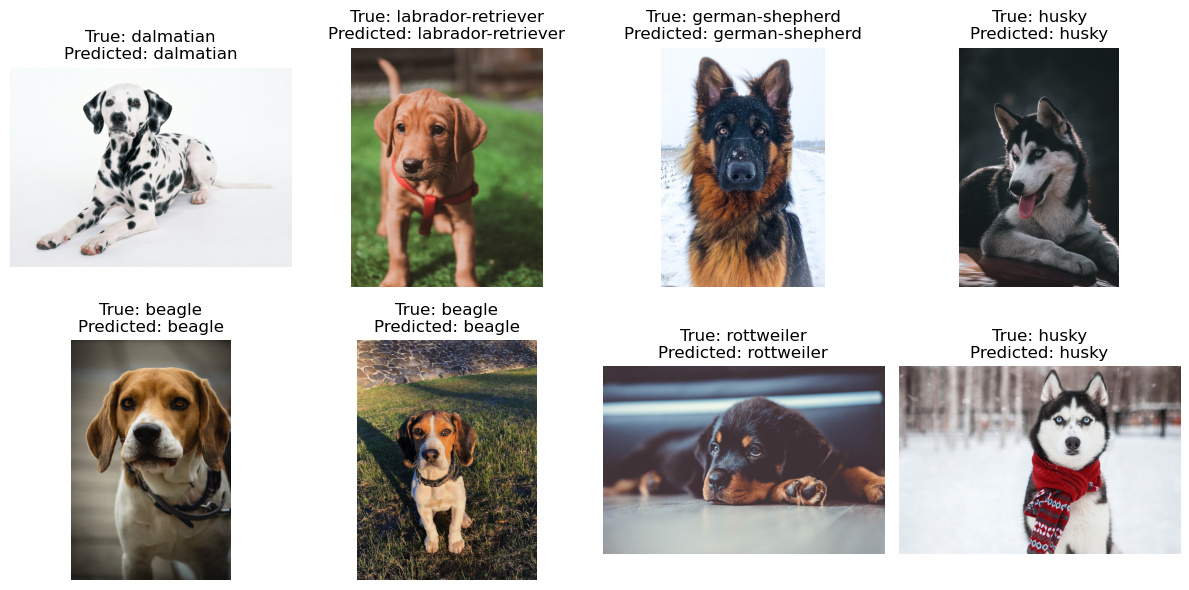

In [41]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have a DataFrame called 'test' containing image paths and labels

num_images = 8
rows = 2
cols = num_images // rows

# Generate random indices to select unique images
indices = random.sample(range(test.shape[0]), num_images)

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i in range(num_images):
    row = i // cols
    col = i % cols
    index = indices[i]
    img_path = test.loc[index, "Image"]
    true_label = test.loc[index, "BREED"]
    predicted_label = y_pred[index]
    
    img = Image.open(img_path)
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


###  confusion matrix

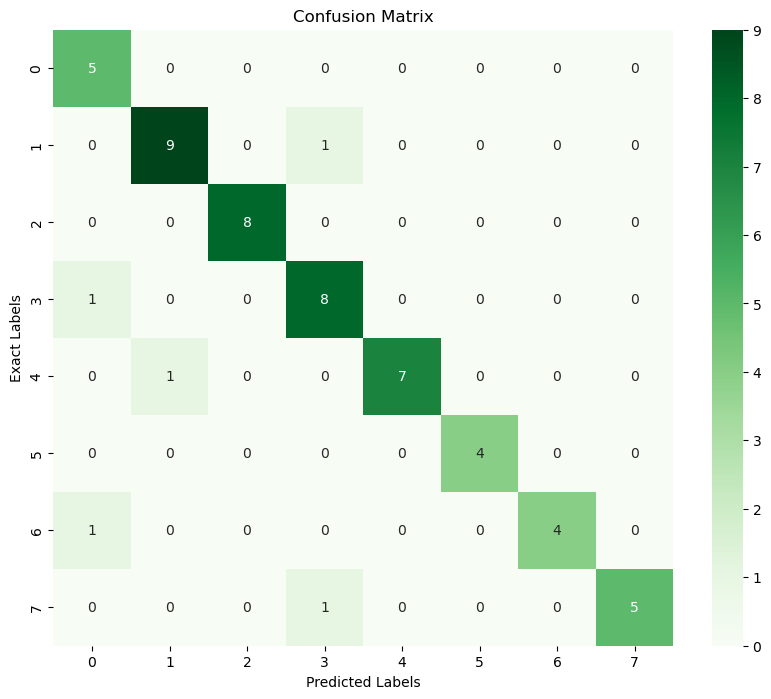

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.show()